In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
i_data = 20*torch.rand(1,3)
o_data = 100*torch.rand(1,1)

In [3]:
o_data

tensor([[8.4436]])

In [4]:
def Sigmoid(t, grad=False):
    if(grad):
        return t*(1-t)
    return 1/(1+torch.exp(-t))

In [5]:
w1 = torch.rand(3,4)
w2 = torch.rand(4,1)

In [6]:
errs, preds = [],[]
for i in range(200):

    print("---------------------------------------------------------")
    print("Epoch : ", i+1)
    
    l1 = Sigmoid(torch.matmul(i_data,w1))
    o = torch.matmul(l1,w2)
    preds.append(o.data)
    print("Pred : ", o.data)
    
    o_err = o_data - o
    o_del = o_err #* Sigmoid(o, grad=True)
    l1_err = torch.matmul(o_del,torch.t(w2))
    l1_del = l1_err * Sigmoid(l1, grad=True)
    errs.append(o_err)
    
    w1 += torch.matmul(torch.t(i_data),l1_del)*0.01
    w2 += torch.matmul(torch.t(l1),o_del)*0.01
    
    print("Error : ", o_err.data, "\n")

---------------------------------------------------------
Epoch :  1
Pred :  tensor([[1.6978]])
Error :  tensor([[6.7458]]) 

---------------------------------------------------------
Epoch :  2
Pred :  tensor([[1.9643]])
Error :  tensor([[6.4794]]) 

---------------------------------------------------------
Epoch :  3
Pred :  tensor([[2.2204]])
Error :  tensor([[6.2232]]) 

---------------------------------------------------------
Epoch :  4
Pred :  tensor([[2.4666]])
Error :  tensor([[5.9770]]) 

---------------------------------------------------------
Epoch :  5
Pred :  tensor([[2.7033]])
Error :  tensor([[5.7403]]) 

---------------------------------------------------------
Epoch :  6
Pred :  tensor([[2.9308]])
Error :  tensor([[5.5128]]) 

---------------------------------------------------------
Epoch :  7
Pred :  tensor([[3.1495]])
Error :  tensor([[5.2942]]) 

---------------------------------------------------------
Epoch :  8
Pred :  tensor([[3.3596]])
Error :  tensor([[5.08

Error :  tensor([[0.0766]]) 

---------------------------------------------------------
Epoch :  112
Pred :  tensor([[8.3701]])
Error :  tensor([[0.0735]]) 

---------------------------------------------------------
Epoch :  113
Pred :  tensor([[8.3730]])
Error :  tensor([[0.0706]]) 

---------------------------------------------------------
Epoch :  114
Pred :  tensor([[8.3759]])
Error :  tensor([[0.0678]]) 

---------------------------------------------------------
Epoch :  115
Pred :  tensor([[8.3786]])
Error :  tensor([[0.0651]]) 

---------------------------------------------------------
Epoch :  116
Pred :  tensor([[8.3812]])
Error :  tensor([[0.0625]]) 

---------------------------------------------------------
Epoch :  117
Pred :  tensor([[8.3837]])
Error :  tensor([[0.0600]]) 

---------------------------------------------------------
Epoch :  118
Pred :  tensor([[8.3861]])
Error :  tensor([[0.0576]]) 

---------------------------------------------------------
Epoch :  119
Pre

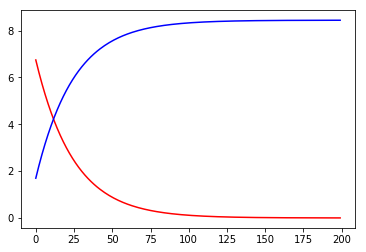

In [7]:
plt.plot(errs,"r",label="Errors")
plt.plot(preds,"b",label="Predictions")
plt.show()